In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [5]:
df= pd.read_csv(r'D:\priya\Steel_industry_data.csv') 
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [7]:

df['CO2(tCO2)'] = df.apply(lambda row: row['Usage_kWh'] * 0.5 if row['CO2(tCO2)'] == 0 else row['CO2(tCO2)'], axis=1)


df['Leading_Current_Reactive_Power_kVarh'] = df['Leading_Current_Reactive_Power_kVarh'].replace(0, df['Leading_Current_Reactive_Power_kVarh'].median())


In [8]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,1.585,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,2.000,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,1.620,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,1.655,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,1.910,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,1.925,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,1.870,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,1.890,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,1.890,77.72,99.96,85500,Weekday,Monday,Light_Load


In [9]:

df = pd.get_dummies(df, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)


In [10]:
df.drop(columns=['date'], inplace=True)


In [11]:

bins = [0, 5, 10, 15, np.inf]  
labels = ['Low', 'Medium', 'High', 'Very High']
df['Usage_Category'] = pd.cut(df['Usage_kWh'], bins=bins, labels=labels)


X = df.drop(columns=['Usage_kWh', 'Usage_Category'])

y = df['Usage_Category']


In [15]:
from scipy import stats



In [16]:

z_scores = np.abs(stats.zscore(X))

threshold = 3
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[(z_scores < threshold).all(axis=1)]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9979499194611217
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.80      0.83        40
         Low       1.00      1.00      1.00      3739
      Medium       1.00      1.00      1.00       371
   Very High       1.00      1.00      1.00      2679

    accuracy                           1.00      6829
   macro avg       0.97      0.95      0.96      6829
weighted avg       1.00      1.00      1.00      6829



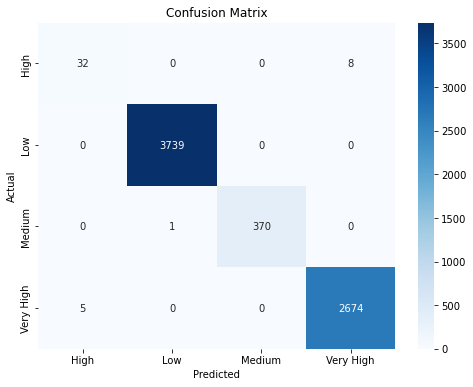

In [20]:

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}


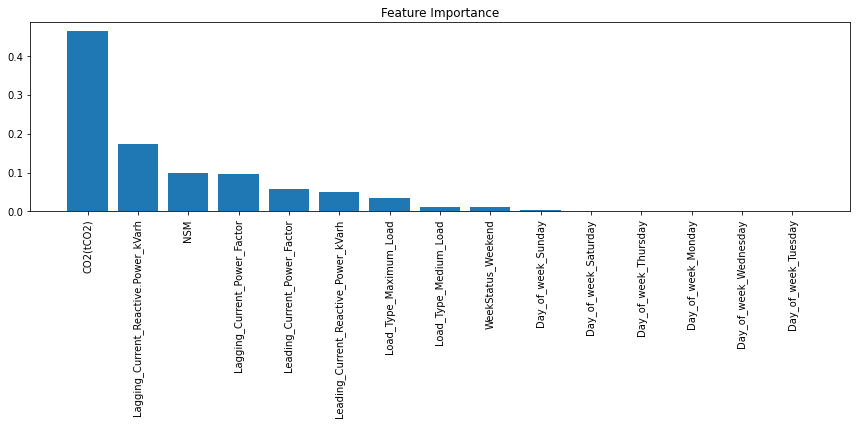

In [22]:

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [23]:

y_pred_final = grid_search.best_estimator_.predict(X_test_scaled)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy: {accuracy_final}")


Final Accuracy: 0.9973641821642993
